# HGCAL FE studies

### imports and initial setup

In [31]:
#imports and setup
%matplotlib inline
%cd /home/naodell/work/hgcal

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from descartes import PolygonPatch
from tqdm import tqdm_notebook

import scripts.helpers as hlp
from skhep.modeling import bayesian_blocks

import matplotlib
matplotlib.rcParams.update({'font.size': 16})

/home/naodell/work/hgcal


### get the data mixtures

In the script `**.py`, I make mixtures of signal and pileup samples.  

In [32]:
data_file = open('data/mc_mixtures/single_electron_pt35_10000_0.pkl', 'rb')
gen_list = pickle.load(data_file)
df_list = pickle.load(data_file)

algos = [
         'baseline',
         'threshold_1bx_esort',  'threshold_8bx_esort',
         'threshold_1bx_nosort', 'threshold_8bx_nosort', 
        ]
ratios = {n:[] for n in algos}
columns = ['reco_e', 'sim_e', 'pt', 'mip_pt']
for gpart, data in zip(gen_list, df_list):
    gen1 = gpart.iloc[0]
    gen2 = gpart.iloc[1]
    if 1.7 < abs(gen1.eta) < 2.7:
        df_baseline = data.query('sim_e > 0').groupby('zside')[columns].sum() 
        den = np.array([gen1.e, gen1.e, gen1.pt, gen1.pt])
        r = df_baseline/den
        ratios['baseline'].append(r.values)
        
        for k, v in ratios.items(): 
            if k == 'baseline':
                continue
            df_num = data.query(f'sim_e > 0 and {k}').groupby('zside')[columns].sum() 
            r = df_num/den
            v.append(r.values)
        
        #print('*------------------------------------------*')
        #print(gen)
        #print(df_num)
        #print(df_den)
        #print(r)
        #print('*------------------------------------------*')

ratios = {k:pd.DataFrame(np.vstack(v), columns=columns) for k, v in ratios.items()}

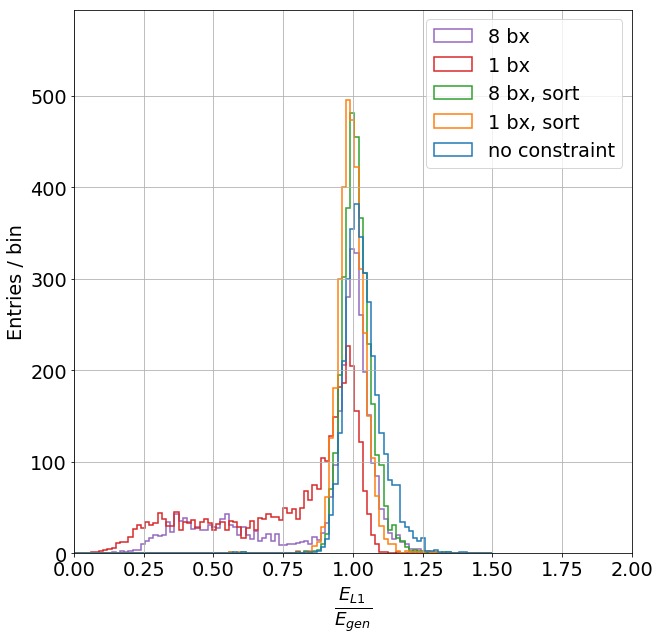

In [43]:
fig = plt.figure(figsize=(10, 10), facecolor='white')

ax = plt.subplot()
h, b, _ = ax.hist([ratios[n]['reco_e'] for n in algos], bins=100, range=[0, 1.5], linewidth=1.5, histtype='step')

ax.set_xlim(0, 2.)
ax.set_ylim(0, 1.2*np.max(h))
#ax.set_xlabel(r'$\frac{p_{T,L1}}{p_{T,gen}}$', fontsize=26)
ax.set_xlabel(r'$\frac{E_{L1}}{E_{gen}}$', fontsize=26)
ax.set_ylabel('Entries / bin')

labels = ['8 bx', '1 bx', '8 bx, sort', '1 bx, sort', 'no constraint']
ax.legend(labels)

plt.savefig('plots/threshold_algo_resolution_e35.pdf')
plt.show()